In [201]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import rotate
import cv2

In [202]:
name1="Materiales/AireMu.txt"
name2="Materiales/PMMAMu.txt"
name3="Materiales/AguaMu.txt"
MaterialAire = np.genfromtxt(name1)
MaterialPMMA = np.genfromtxt(name2)
MaterialAgua = np.genfromtxt(name3)

Phase retrieval-Beltran

In [203]:
nameP="AngiografiaR"
nameM="Inline"
nameV="28kVp"
nameF="FilterAl"
nameD="Dist1"
nameTP="PlaqueI"
nameDa="PData"
name0=nameP+"/"+nameM+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameTP+"/"+nameDa+"/RAWS.txt"
a=5.5*(10**(-5))
Npixeles=256
PDith=7
E=23 #28kVp #Promedio
#E=27 #38kVp
#E=30 #48kVp
#E=35 #58kVp
#E=37 #68kVp
#E=39 #78kVp
z=0.1922 #Dist1
#z=0.6 #Dist2
#z=1.2 #Dist3
zs=0.6
M=(z+zs)/zs
###############################################
delta_m1=MaterialAgua[E-1][1] # Agua
mu_m1=MaterialAgua[E-1][0]
delta_muestra1=MaterialPMMA[E-1][1] # PMMA
mu_muestra1=MaterialPMMA[E-1][0]
delta_muestra2=MaterialAire[E-1][1] # Aire
mu_muestra2=MaterialAire[E-1][0]
#############################################
delta_rel1=(delta_muestra1-delta_m1) 
mu_rel1=(mu_muestra1-mu_m1)
delta_rel2=(delta_muestra2-delta_muestra1) 
mu_rel2=(mu_muestra2-mu_muestra1)
ss=2
sss=0
x=np.arange(0,Npixeles,1)
x_J = np.multiply(x,a*(10**(3)))
xL=np.arange(0,Npixeles,27) #Dist1
#xL=np.arange(0,Npixeles,36) #Dist2
#xL=np.arange(0,Npixeles,45) #Dist3
labels=[int(i) for i in xL]

In [204]:
def Esp(name, a, delta, mu, z, M, ss):
    frr = np.fft.fftshift(np.fft.fft2(name))  
    Npixeles = len(name)
    u=np.fft.fftshift(np.fft.fftfreq(Npixeles, a))
    v=np.fft.fftshift(np.fft.fftfreq(Npixeles, a))
    uu, vv = np.meshgrid(u, v)
    freq_matrix = (4*(np.pi**2))*(uu**2 + vv**2)
    freq_matrixx=-(2/(a**2))*(np.cos(2*np.pi*a*uu)+np.cos(2*np.pi*a*vv)-2)
    W=(delta*z)/(mu*M) 
    AA=np.ones((Npixeles,Npixeles)) 
    Q=AA+W*freq_matrixx
    QQ=(Q)/(Q**2+ss)
    A=QQ*frr
    img_back = np.fft.ifft2(np.fft.ifftshift(A)).real 
    A1=-(1/mu)*np.log(img_back)
    return A1

In [205]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

In [206]:
def func(x,r,PosX):
    k=np.sqrt(r**2 - ((PosX-x))**2)
    return k

In [207]:
def TubST(X1,X2,Npixeles):
    Thick=np.zeros((Npixeles,Npixeles))
    E=np.concatenate((np.zeros(X1),2*func(x[X1:X2],(X2-X1)/2,(X1+X2)/2),np.zeros(Npixeles-X2)))
    for i in range(Npixeles):
        Thick[i,]=E
    return Thick

In [208]:
def TubLT(X1,X2,Npixeles):
    Thick=np.zeros((Npixeles,Npixeles))
    E=2*func(x,(X2-X1)/2,(X1+X2)/2)
    for i in range(Npixeles):
        Thick[i,]=E
    return Thick

In [209]:
RAWCN= np.genfromtxt(name0)

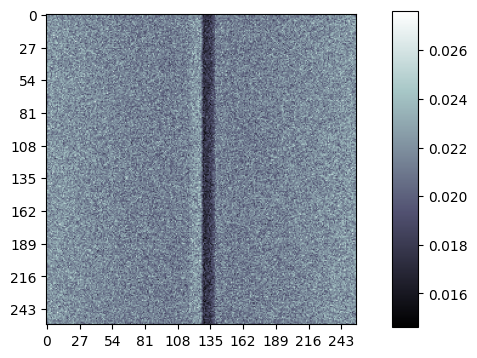

In [210]:
fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(RAWCN, cmap="bone")
plt.xticks(xL,labels)
plt.yticks(xL,labels)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)

In [211]:
PIRAWCN=PI(RAWCN,0,Npixeles,0,Npixeles)

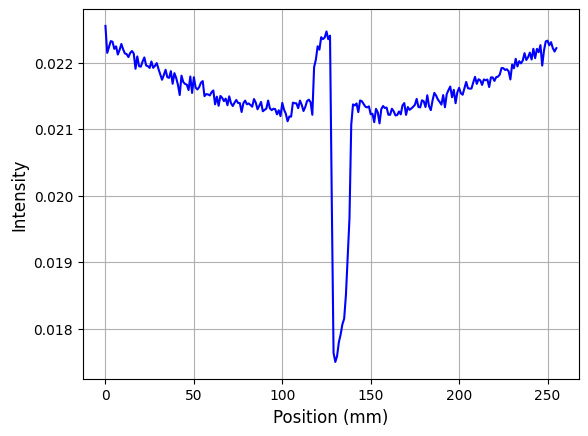

In [ ]:
X5=118 #Internal Dist1
X6=140
X3=-592 #External Dist1
X4=848
#X5=111 #Internal Dist2
#X6=145
#X3=-963 #External Dist2
#X4=1219
#X5=102 #Internal Dist3
#X6=154
#X3=-1508 #External Dist3
#X4=1764
fig,ax=plt.subplots()
plt.plot(PIRAWCN, color="blue",label="Simulation")
#plt.axvline(x=X1, ymin=0, ymax=20,linestyle="-.", color="brown")
#plt.axvline(x=X2, ymin=0, ymax=20,linestyle="-.", color="brown")
#plt.axvline(x=X5, ymin=0, ymax=20,linestyle="-.", color="green")
#plt.axvline(x=X6, ymin=0, ymax=20,linestyle="-.", color="green")
plt.ylabel("Intensity",fontsize=12)
plt.xlabel("Position (mm)",fontsize=12)
plt.grid()

In [ ]:
Tm2=(TubLT(X3,X4,Npixeles)*a)/M
Tm3=(TubST(X5,X6,Npixeles)*a)/M
TestEsC2=PI(Tm2,0,Npixeles,0,Npixeles)
TestEsC3=PI(Tm3,0,Npixeles,0,Npixeles)

In [ ]:
RAWC_M1=RAWCN/(np.exp(-mu_muestra1*TestEsC2))
M_RAWC1=(Esp(RAWC_M1, a, delta_rel2, mu_rel2, z, M, sss))

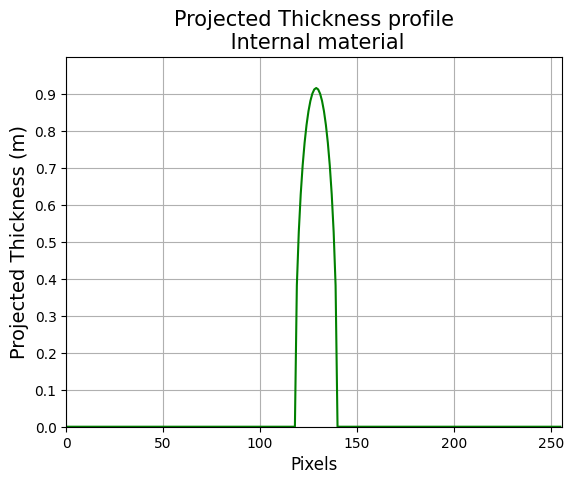

In [215]:
fig,ax=plt.subplots()
plt.plot(TestEsC3*1000, '-', color="green")
plt.title("Projected Thickness profile\n Internal material",fontsize=15)
plt.ylabel("Projected Thickness (m)",fontsize=14)
plt.xlabel("Pixels",fontsize=12)
plt.xlim(0,RAWCN.shape[1])
plt.xticks(np.arange(0,RAWCN.shape[1], 50))
plt.ylim(0,1)
plt.yticks(np.arange(0,1, 0.1))
plt.grid()

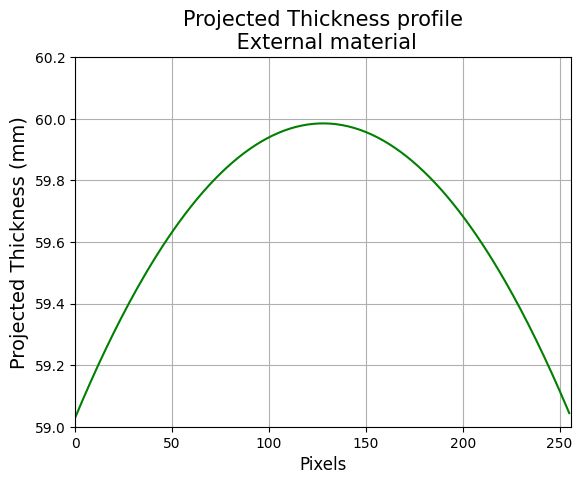

In [216]:
fig,ax=plt.subplots()
plt.plot(TestEsC2*1000, '-', color="green")
plt.title("Projected Thickness profile\n External material",fontsize=15)
plt.ylabel("Projected Thickness (mm)",fontsize=14)
plt.xlabel("Pixels",fontsize=12)
plt.xlim(0,RAWCN.shape[1])
plt.xticks(np.arange(0,RAWCN.shape[1], 50))
plt.ylim(59,60.2)
plt.yticks(np.arange(59,60.2, 0.2))
plt.grid()

In [ ]:
PIMRAWC1=PI(M_RAWC1,0,Npixeles,0,Npixeles)

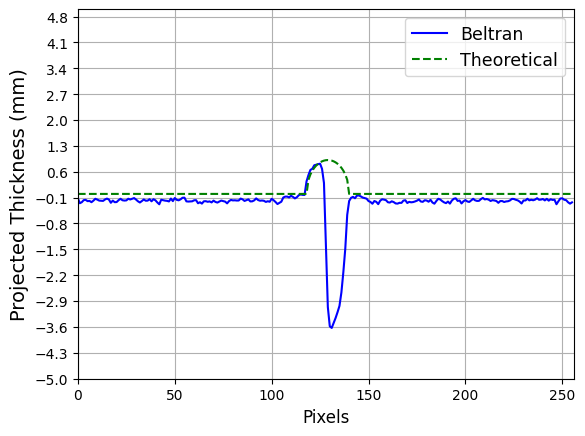

In [220]:
JG=0.012
fig,ax=plt.subplots()
plt.plot((PIMRAWC1+JG)*1000, color="blue",label="Beltran")
plt.plot(TestEsC3*1000,linestyle="--", color="green",linewidth = 1.5,label="Theoretical")
plt.ylabel("Projected Thickness (mm)",fontsize=14)
plt.xlabel("Pixels",fontsize=12)
plt.xlim(0,RAWCN.shape[1])
plt.xticks(np.arange(0,RAWCN.shape[1], 50))
plt.ylim(-5,5)
plt.yticks(np.arange(-5,5, 0.7))
plt.grid()
plt.legend(loc=0,mode = "Expand", ncol=1,fontsize=12.5)

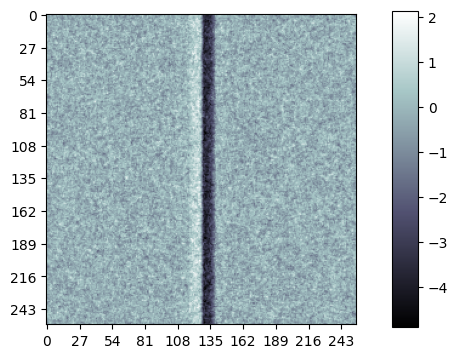

In [222]:
fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow((M_RAWC1+JG)*1000, cmap="bone")
plt.xticks(xL,labels)
plt.yticks(xL,labels)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)